In [1]:
import tensorflow as tf

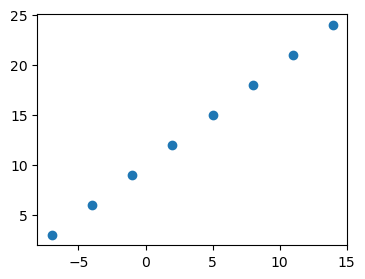

In [2]:
# creating a simple data set
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.figure(figsize=[4, 3])
plt.scatter(X, y)

In [3]:
# Example input and output shapes of a regresson model-house price
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([838573])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([838573])>)

In [4]:
house_info.shape

TensorShape([3])

In [5]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

Here we can see that our tensor have no shape bcz it is a rank 0 tensor or a scalar

# Steps in modeling with TensorFlow<br>
1) Creating a model - using using the Functional or Sequential API or import a previously built model (known as transfer learning).<br>
2) Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).<br>
3) Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [6]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
# model.fit(X, y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [7]:
# Make a prediction with the model
model.predict([17.0])

array([[12.716021]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

# Improving a model

1) Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.<br>
2) Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.<br>
3) Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).<br>

common ways to improve a deep learning model.<br>
Adding layers<br>
increasing the number of hidden units<br>
change the activation function<br>
change the optimization function<br>
change the learning rate<br>
fitting(traning) on more data and fitting for long time

In [8]:
# train our model for longer

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 4m

1/1 [==============================] - 0s 4ms/step - loss: 6.9488 - mae: 6.9488
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9431 - mae: 6.9431
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9375 - mae: 6.9375
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9319 - mae: 6.9319
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9263 - mae: 6.9263
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9206 - mae: 6.9206
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9150 - mae: 6.9150
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9094 - mae: 6.9094
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9038 - mae: 6.9038
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8981 - mae: 6.8981
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8925 - ma

In [9]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [10]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

Much better result, but we need more improvement

# Evaluating a model

A typical workflow when building a neural network is <br>
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...<br>
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

#### When it come to evaluation it's a good idea to visualize <br>
The data - what data are you working with? What does it look like?<br>
The model itself - what does the architecture look like? What are the different shapes?<br>
The training of a model - how does a model perform while it learns?<br>
The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?<br>

In [11]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [12]:
# Make labels for the dataset
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

y = X + 10<br>

In [13]:
# this is the pattern
y = X + 10

In [14]:
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# Split data into training/test set<br>
1)Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).<br>
2)Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).<br>
3)Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).<br>

In [15]:
# Check how many samples we have
len(X)

50

In [16]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

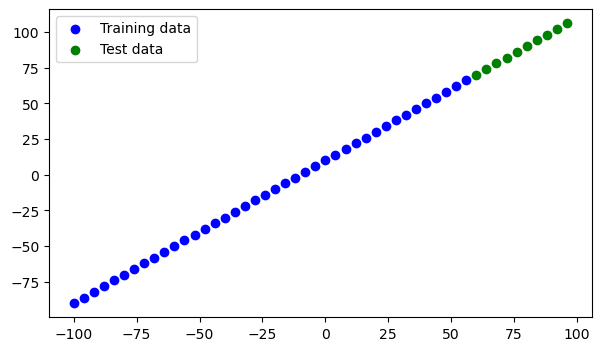

In [17]:
#Visualizing the model
plt.figure(figsize=(7, 4))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend()

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])

In [19]:
model.summary()
# ValueError: This model has not yet been built. Build the model first by calling `build()` 
# or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [26]:
# We can let our model know the input shape of our data using the input_shape 

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

### Visualizing the model  summary()

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


<b>Total params</b> - total number of parameters in the model.<br>
<b>Trainable parameters</b> - these are the parameters (patterns) the model can update as it trains.<br>
<b>Non-trainable parameters</b> - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [28]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#####  Alongside summary, can also view a 2D plot of the model using plot_model().

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [31]:
!apt-get install graphviz

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


# Visualizing the predictions<br>
To visualize predictions, it's always a good idea to plot them against the ground truth labels.<br>
y_test vs. y_pred (ground truth vs. predictions).

In [32]:
# Make predictions
y_preds = model.predict(X_test)

In [33]:
# View the predictions
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [34]:
# functionize prediction 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
    """
    plot traning data, test data and compare predictions
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

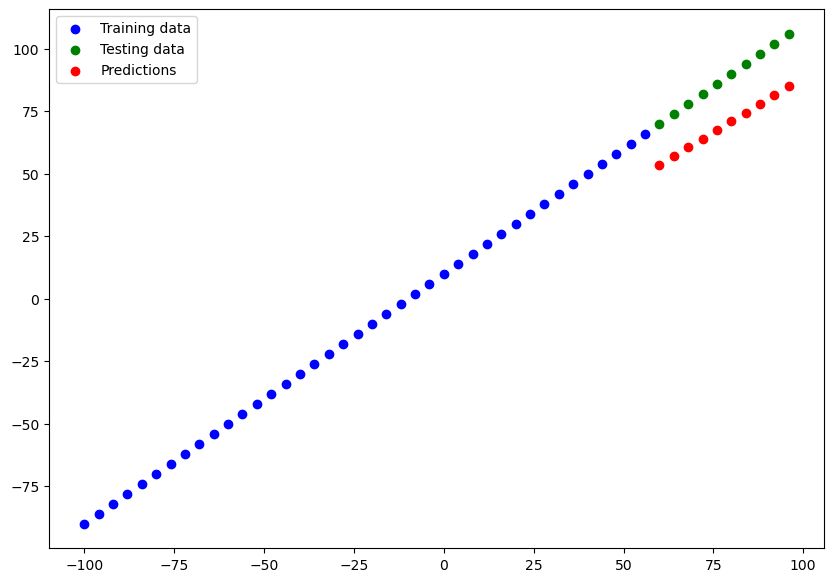

In [35]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions<br>
Two of the main metrics used for regression problems are:

<b>Mean absolute error (MAE)</b> - the mean difference between each of the predictions.<br>
<b>Mean squared error (MSE)</b> - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [36]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 109ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [37]:
# Tensorflow also have built in functions for MSE and MAE
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

MAE should be a single output.<br>

Instead, we get 10 values.<br>

This is because our y_test and y_preds tensors are different shapes.<br>

In [38]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [39]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [40]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [41]:
# to change this shape we can use squeeze, it will remove all 1D
y_preds.squeeze().shape

(10,)

In [42]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [43]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

### We can also calculate the MAE using pure TensorFlow functions.

In [44]:
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

#### Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).

In [45]:
# Let's make functions for our evaluation metrics.
def mae(y_test, y_pred):
    """
    calculate mean absolute error between y_test and y_preds
    """
    return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
    """
    calculate mean squared error between y_test and y_preds
    """
    return tf.metrics.mean_squared_error(y_test, y_pred)

# Running experiments to improve a model<br>
there are many different ways you can do this, but 3 of the main ones are:<br>
1)<b>Get more data</b> - get more examples for your model to train on (more opportunities to learn patterns).<br>
2)<b>Make your model larger (use a more complex model)</b> - this might come in the form of more layers or more hidden units in each layer.<br>
3)<b>Train for longer</b> - give your model more of a chance to find the patterns in the data.<br>

model_1 - same as original model, 1 layer, trained for 100 epochs.<br>
model_2 - 2 layers, trained for 100 epochs.<br>
model_3 - 2 layers, trained for 500 epochs.<br>

Build model_1

In [46]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

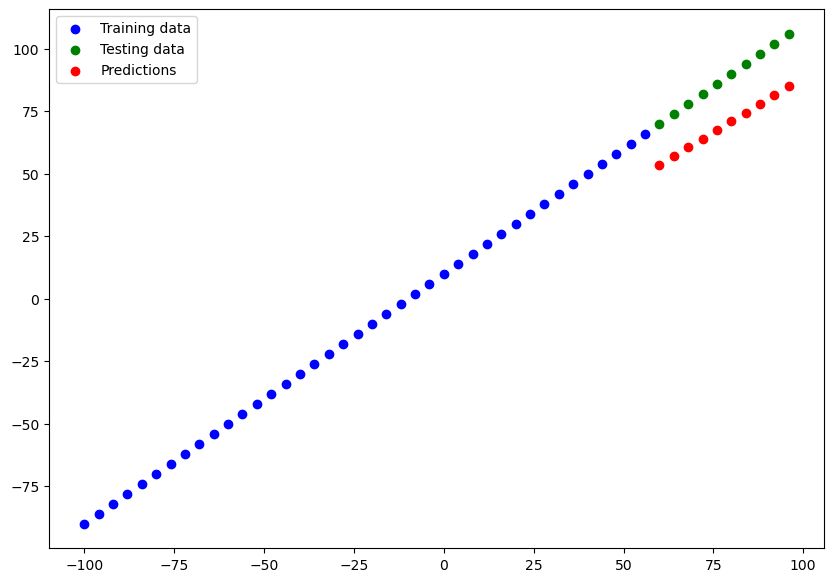

In [47]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [48]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.5734)

Build model_2

In [49]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

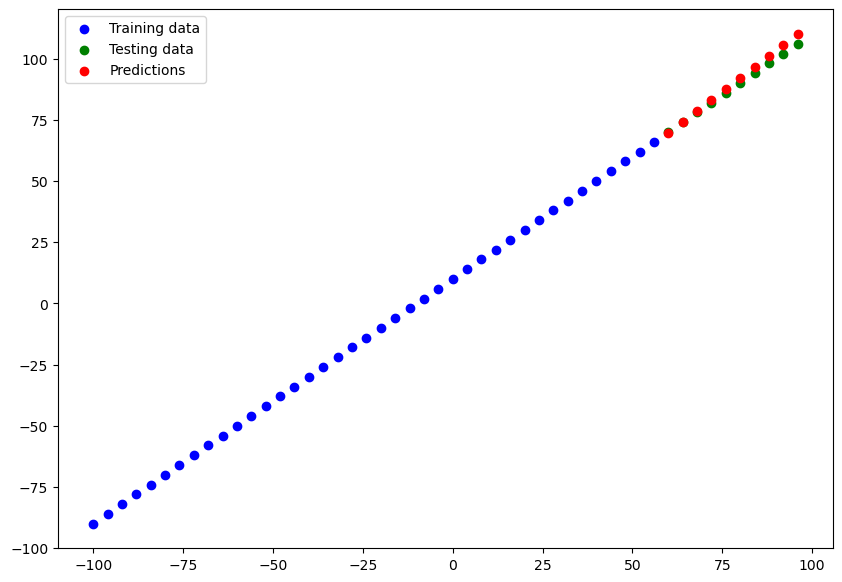

In [50]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [51]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098228, 5.459301)

Build model_3

In [52]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

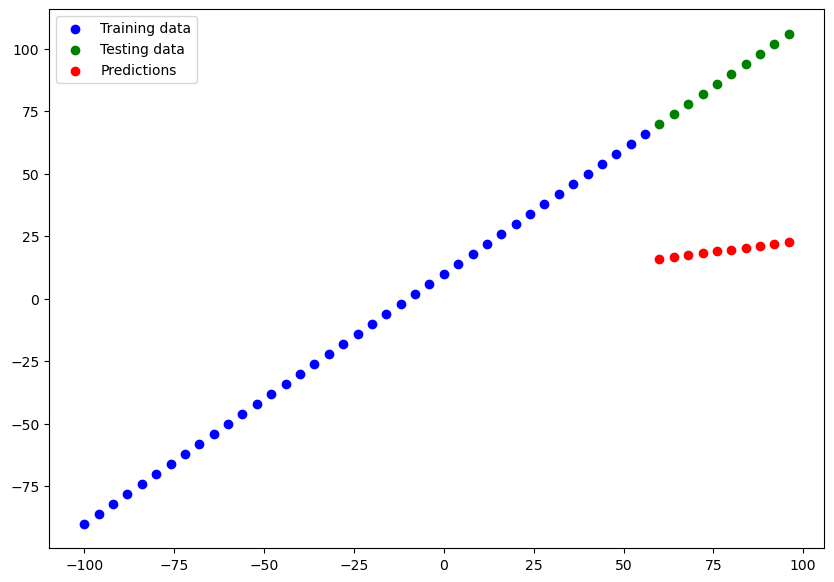

In [53]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Here we can see that after training for too long model perform worse<br>

In [54]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68787, 4804.4717)

In [55]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [56]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,1.909823,5.459301
2,model_3,68.687866,68.687866


# Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.<br>

We've done a simple version of this above (keeping the results in different variables).<br>

📖 Resource: But as you build more models, you'll want to look into using tools such as:<br>

<b>TensorBoard</b> - a component of the TensorFlow library to help track modelling experiments (we'll see this later).<br>
<b>Weights & Biases</b> - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving a model<br>
You can save a TensorFlow/Keras model using model.save()

In [57]:
# Save model using using the tensorflow format
# get a folder
model_2.save("model_saveedModel_format")

INFO:tensorflow:Assets written to: model_saveedModel_format\assets


In [59]:
# HDF5 - universal data format if we need to use our model outside of pure tensorflow code may be HDF5 is better
# single file
model_2.save("model_saveedModel_format.h5")

# Loading a model<br>
We can load a saved model using the load_model() method.

In [60]:
load_saved_model = tf.keras.models.load_model('model_saveedModel_format')
load_saved_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [66]:
# compare model_2 with load_saved_model
model_2_preds = model_2.predict(X_test)
load_saved_model_preds = load_saved_model.predict(X_test)
model_2_preds == load_saved_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
# Loading model using the h5 format
load_saved_model_h5 = tf.keras.models.load_model('model_saveedModel_format.h5')
load_saved_model_h5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [71]:
# compare model_2 with load_saved_model h5
model_2_pred = model_2.predict(X_test)
load_saved_model_h5_pred = load_saved_model.predict(X_test)
model_2_pred == load_saved_model_h5_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Downloading a model (from Google Colab)<br>
Right click on the file in the files pane and click 'download'. or<br>
Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

we can save it to google drive by connecting Google drive and copying it there 

In [ ]:
from google.colab import files
files.download('content/best_mode_HDF5_format.h5')